# Ejercicio integrador para clase: Análisis y clasificación con dataset Iris

# Parte 1: Clasificación supervisada 

# 1. Carga el dataset Iris.


In [34]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_blobs
from sklearn.metrics import adjusted_rand_score, homogeneity_score
# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
# Convertir a DataFrame de pandas y mostrar las primeras filas
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(y, iris.target_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


# 2. Divide los datos en conjunto de entrenamiento (70%) y prueba (30%).

In [22]:
# 2.  Dividir en entrenamiento y prueba (70% - 30%)
# Dividir datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
) 

# A continuación los puntos:
3. (Entrena y evalúa estos modelos para predecir la especie de iris),
4. (Calcula y muestra la precisión de cada modelo en el conjunto de prueba),
5. (Visualiza el árbol de decisión entrenado),
Seran realizados para cada uno de los siguientes modelos:

a. Árbol de decisión.,

b. Random Forest (100 árboles).,

c. SVM con kernel RBF.


In [23]:
# a. Arbol de decisión.
# punto 3 del ejercicio:
# Creamos el modelo de árbol de decisión.
clf = DecisionTreeClassifier(
    random_state=42
)  # Crea un clasificador de árbol de decisión vacio
clf.fit(
    x_train, y_train
)

DecisionTreeClassifier(random_state=42)

In [25]:

# punto 4 del ejercicio:
# predecimos las etiquetas del conjunto de prueba del modelo de Arbol de Decisión.
Y_pred = clf.predict(
    x_test
) 
# Evaluar la precisión del modelo
accuracy = (Y_pred == y_test).mean()
# imprimir la precisión del árbol de decisión
print(f"Precisión del Árbol de Decisión: {accuracy:.2f}")
# Lo siguiente lo adicione para analisis mas especificos del modelo para posibles usus futuros
# Reporte de clasificación y matriz de confusión
print("Reporte de clasificación Árbol de Decisión:")
print(classification_report(y_test, Y_pred))
print("Matriz de confusión Árbol de Decisión:")
print(confusion_matrix(y_test, Y_pred))

Precisión del Árbol de Decisión: 1.00
Reporte de clasificación Árbol de Decisión:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Matriz de confusión Árbol de Decisión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


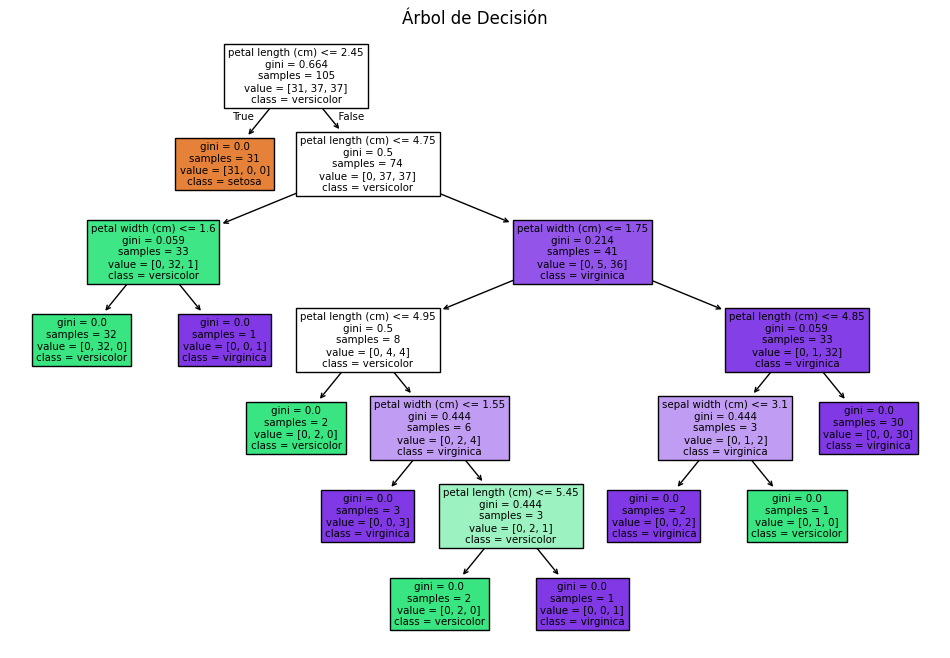

In [26]:
# Punto 5 del ejercicio:
# Visualización del Árbol de Decisión
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True)
plt.title("Árbol de Decisión")
plt.show()

In [27]:
# b. Random Forest (100 árboles).
# Punto 3 del ejercicio:
# Creamos el modelo de Random Forest con 100 árboles.
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Entrenamos el modelo.
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Punto 4 del ejercicio:
# Predecimos las etiquetas del conjunto de prueba del modelo de Random Forest.
y_pred_rf = rf.predict(x_test)

# Evaluar la precisión
accuracy_rf = (y_pred_rf == y_test).mean()
print(f"Precisión del Random Forest: {accuracy_rf:.2f}")

Precisión del Random Forest: 1.00


In [29]:
# c. SVM con kernel RBF.
# Punto 3 del ejercicio:
# Creamos el modelo SVM con kernel RBF.
svm_model = SVC(kernel='rbf', random_state=42)
# Entrenamos el modelo SVM.
svm_model.fit(x_train, y_train)
# Punto 4 del ejercicio:
# Predecimos las etiquetas del conjunto de prueba del modelo SVM.
y_pred_svm = svm_model.predict(x_test)
# Evaluar la precisión del modelo SVM
accuracy_svm = (y_pred_svm == y_test).mean()
print(f"Precisión del SVM: {accuracy_svm:.2f}")

Precisión del SVM: 1.00


# Parte 2: Clustering no supervisado

Adjusted Rand Index (K-Means): 0.60
Homogeneity Score (K-Means): 0.65


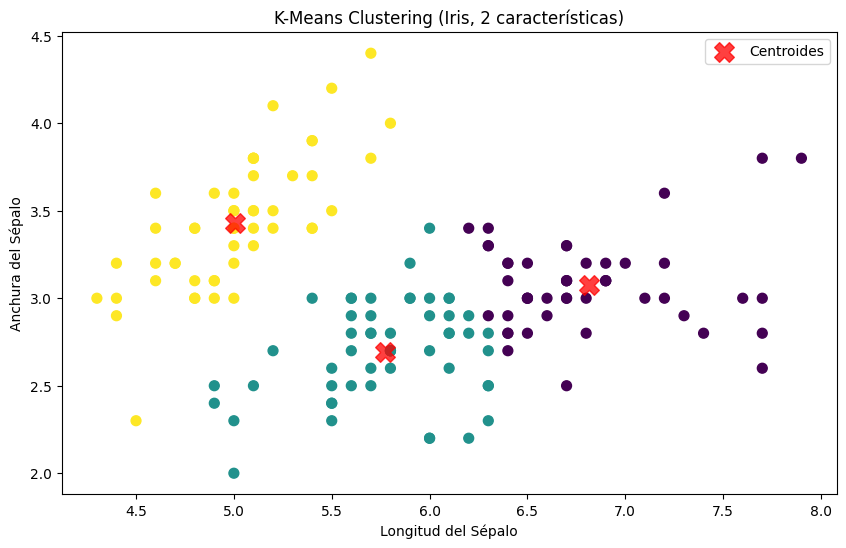

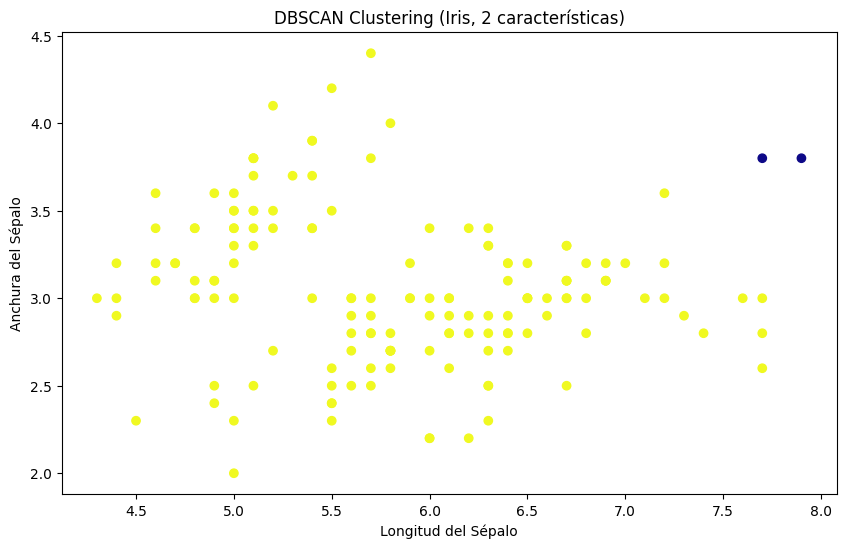

Adjusted Rand Index (DBSCAN vs Real): 0.00
Homogeneity Score (DBSCAN vs Real): 0.01


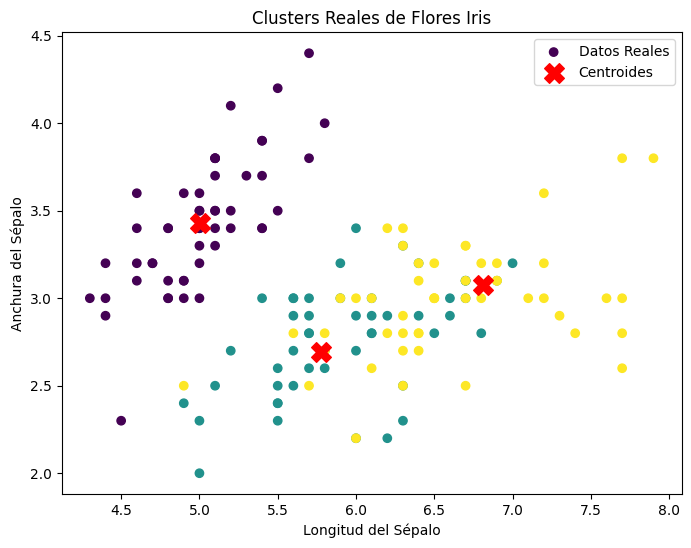

In [46]:
# 1. Usa solo las dos primeras características para facilitar visualización.
# Seleccionamos las dos primeras características
X_vis = X[:, :2] # Usar 'sepal length' y 'sepal width'
# 2. Aplica K-Means para encontrar 3 clusters. Visualiza los clusters y sus centroides
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_vis)
centroids = kmeans.cluster_centers_
# Evaluar K-Means con ARI y homogeneity_score Para evaluar qué tan bien se aproximan los clusters a las clases reales
ari = adjusted_rand_score(y, kmeans_labels)
homogeneity = homogeneity_score(y, kmeans_labels)
print(f"Adjusted Rand Index (K-Means): {ari:.2f}")
print(f"Homogeneity Score (K-Means): {homogeneity:.2f}") 
# Visualizar los clusters de K-Means
plt.figure(figsize=(10, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=kmeans_labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroides')
plt.title('K-Means Clustering (Iris, 2 características)')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Anchura del Sépalo')
plt.legend()
plt.show()

# 3. Aplica DBSCAN con eps=0.5 y min_samples=5. Visualiza los clusters y los puntos etiquetados como ruido.
# Aplicar DBSCAN (eps=0.5, min_samples=5)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_vis)
# Visualizar los clusters de DBSCAN
plt.figure(figsize=(10, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=dbscan_labels, cmap='plasma', label='Clusters DBSCAN')
plt.title("DBSCAN Clustering (Iris, 2 características)")
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Anchura del Sépalo')
plt.show()
# Evaluar DBSCAN comparando con etiquetas reales este lo adicione para verlo:
ari_dbscan = adjusted_rand_score(y, dbscan_labels)
homogeneity_dbscan = homogeneity_score(y, dbscan_labels)
print(f"Adjusted Rand Index (DBSCAN vs Real): {ari_dbscan:.2f}")
print(f"Homogeneity Score (DBSCAN vs Real): {homogeneity_dbscan:.2f}")
# Visualizar los clusters con las etiquetas reales
plt.figure(figsize=(8, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, cmap='viridis', label='Datos Reales')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title('Clusters Reales de Flores Iris')
plt.xlabel('Longitud del Sépalo')
plt.ylabel('Anchura del Sépalo')
plt.legend()
plt.show()


Adjusted Rand Index (DBSCAN vs Real): 0.00
Homogeneity Score (DBSCAN vs Real): 0.01
